# Premier League Football Data - Exploratory Data Analysis

## Part 1: Data Overview and Structure

This notebook provides a comprehensive overview of the Premier League football dataset, including:
- Data structure and shape
- Feature distributions
- Missing value analysis
- Basic statistics summary

**Data Source:** FBRef Premier League Statistics (Seasons 2020-2026)

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from IPython.display import display, Markdown
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams['font.size'] = 11

# Data paths
DATA_DIR = Path('../data')
PROCESSED_DIR = DATA_DIR / 'processed'
RAW_DIR = DATA_DIR / 'raw'

display(Markdown("✅ **Libraries loaded successfully!**"))

✅ **Libraries loaded successfully!**

## 1. Load and Explore the Data

In [2]:
# Load main datasets
fixtures = pd.read_csv(PROCESSED_DIR / 'all_fixtures.csv')
team_stats = pd.read_csv(PROCESSED_DIR / 'all_team_stats.csv')

display(Markdown(f"""
# PREMIER LEAGUE DATA OVERVIEW

---

## 📊 All Fixtures Dataset
| Metric | Value |
|--------|-------|
| Shape | **{fixtures.shape[0]:,}** matches × **{fixtures.shape[1]}** columns |
| Seasons | **{fixtures['season'].nunique()}** ({fixtures['season'].min()} to {fixtures['season'].max()}) |
| Unique Teams | **{fixtures['home_team'].nunique()}** |

## 📈 Team Statistics Dataset
| Metric | Value |
|--------|-------|
| Shape | **{team_stats.shape[0]:,}** records × **{team_stats.shape[1]}** columns |
| Seasons | **{team_stats['season'].nunique()}** |
| Teams per season | **~{team_stats.shape[0] // team_stats['season'].nunique()}** |
"""))


# PREMIER LEAGUE DATA OVERVIEW

---

## 📊 All Fixtures Dataset
| Metric | Value |
|--------|-------|
| Shape | **2,110** matches × **20** columns |
| Seasons | **6** (2020-2021 to 2025-2026) |
| Unique Teams | **28** |

## 📈 Team Statistics Dataset
| Metric | Value |
|--------|-------|
| Shape | **120** records × **351** columns |
| Seasons | **6** |
| Teams per season | **~20** |


In [3]:
# Display first few rows of fixtures
display(Markdown("## 🏟️ Sample Fixtures Data"))
display(fixtures[['gameweek', 'date', 'home_team', 'score', 'away_team', 'home_xg', 'away_xg', 'season']].head(10))

## 🏟️ Sample Fixtures Data

,gameweek,date,home_team,score,away_team,home_xg,away_xg,season
0,1,2020-09-12,Fulham,0–3,Arsenal,0.1,1.9,2020-2021
1,1,2020-09-12,Crystal Palace,1–0,Southampton,1.1,0.9,2020-2021
2,1,2020-09-12,Liverpool,4–3,Leeds United,2.7,0.3,2020-2021
3,1,2020-09-12,West Ham United,0–2,Newcastle United,1.0,1.6,2020-2021
4,1,2020-09-13,West Brom,0–3,Leicester City,0.4,2.8,2020-2021
5,1,2020-09-13,Tottenham Hotspur,0–1,Everton,1.1,1.2,2020-2021
6,1,2020-09-14,Sheffield United,0–2,Wolverhampton Wanderers,1.0,1.4,2020-2021
7,1,2020-09-14,Brighton & Hove Albion,1–3,Chelsea,1.1,1.2,2020-2021
8,2,2020-09-19,Everton,5–2,West Brom,3.9,0.3,2020-2021
9,2,2020-09-19,Leeds United,4–3,Fulham,1.4,1.7,2020-2021


In [4]:
# Column categories overview
fixture_cols = fixtures.columns.tolist()
display(Markdown(f"""
## 📋 Fixtures Dataset Columns

- **Total columns:** {len(fixture_cols)}
- **Key columns:** `{', '.join(fixture_cols[:20])}`
"""))


## 📋 Fixtures Dataset Columns

- **Total columns:** 20
- **Key columns:** `gameweek, dayofweek, date, start_time, home_team, home_xg, score, away_xg, away_team, attendance, venue, referee, match_report, notes, season, home_goals, away_goals, match_result, total_goals, goal_diff`


## 2. Data Quality Analysis

In [5]:
# Missing value analysis for fixtures
def missing_value_report(df, name):
    """Generate a missing value report for a dataframe."""
    missing = df.isnull().sum()
    missing_pct = (missing / len(df)) * 100
    
    report = pd.DataFrame({
        'Missing Count': missing,
        'Missing %': missing_pct
    }).sort_values('Missing Count', ascending=False)
    
    report = report[report['Missing Count'] > 0]
    
    if len(report) == 0:
        display(Markdown(f"""
## 🔍 Missing Value Report: {name}

✅ **No missing values found!**
"""))
    else:
        display(Markdown(f"""
## 🔍 Missing Value Report: {name}

**Columns with missing values:** {len(report)}
"""))
        display(report.head(15))
    
    return report

fixtures_missing = missing_value_report(fixtures, "Fixtures")


## 🔍 Missing Value Report: Fixtures

**Columns with missing values:** 2


,Missing Count,Missing %
notes,2110,100.000000
attendance,350,16.587678


In [6]:
# Data types overview
display(Markdown("## 📊 Data Types Distribution"))
display(fixtures.dtypes.value_counts().to_frame("Count"))

## 📊 Data Types Distribution

,Count
object,10
float64,8
int64,2


## 3. Goals and xG Trends Across Seasons

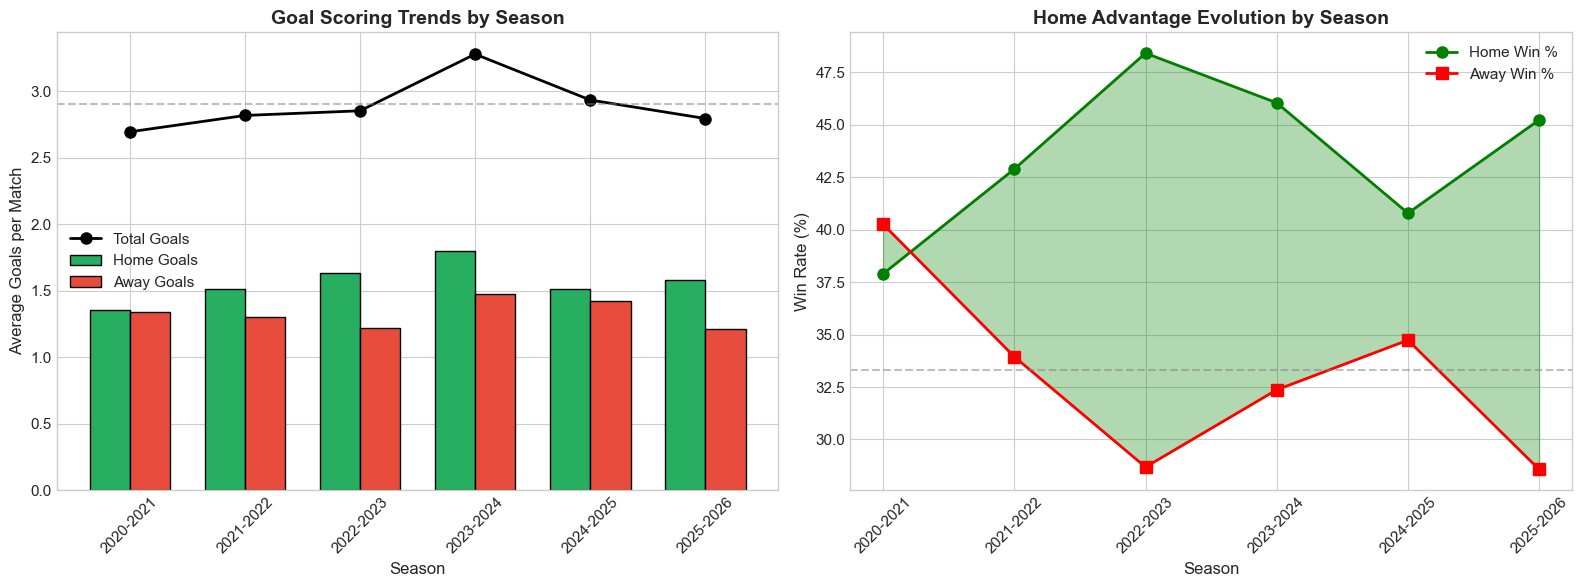


📊 Season-by-Season Statistics:


,season,avg_home_goals,avg_away_goals,avg_home_xg,avg_away_xg,avg_total_goals,home_win_pct,away_win_pct
0,2020-2021,1.35,1.34,1.35,1.24,2.70,37.90,40.26
1,2021-2022,1.51,1.30,1.46,1.21,2.82,42.90,33.95
2,2022-2023,1.63,1.22,1.58,1.26,2.85,48.42,28.68
3,2023-2024,1.80,1.48,1.75,1.35,3.28,46.05,32.37
4,2024-2025,1.51,1.42,1.49,1.34,2.93,40.79,34.74
5,2025-2026,1.58,1.21,1.50,1.21,2.80,45.24,28.57


In [7]:
# Analyze goal scoring and xG trends across seasons - much more insightful for football analytics
season_stats = fixtures.groupby('season').agg({
    'home_goals': 'mean',
    'away_goals': 'mean',
    'home_xg': 'mean',
    'away_xg': 'mean',
    'total_goals': 'mean',
    'match_result': [lambda x: (x == 2).mean() * 100, lambda x: (x == 0).mean() * 100]
}).round(3)
season_stats.columns = ['avg_home_goals', 'avg_away_goals', 'avg_home_xg', 'avg_away_xg', 
                         'avg_total_goals', 'home_win_pct', 'away_win_pct']
season_stats = season_stats.reset_index()

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Goals per match trend
x = range(len(season_stats))
width = 0.35
axes[0].bar([i - width/2 for i in x], season_stats['avg_home_goals'], width, 
            label='Home Goals', color='#27ae60', edgecolor='black')
axes[0].bar([i + width/2 for i in x], season_stats['avg_away_goals'], width, 
            label='Away Goals', color='#e74c3c', edgecolor='black')
axes[0].plot(x, season_stats['avg_total_goals'], 'ko-', linewidth=2, markersize=8, label='Total Goals')
axes[0].set_xticks(x)
axes[0].set_xticklabels(season_stats['season'], rotation=45)
axes[0].set_xlabel('Season', fontsize=12)
axes[0].set_ylabel('Average Goals per Match', fontsize=12)
axes[0].set_title('Goal Scoring Trends by Season', fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].axhline(fixtures['total_goals'].mean(), color='gray', linestyle='--', alpha=0.5)

# Plot 2: Home advantage trend over seasons
axes[1].plot(x, season_stats['home_win_pct'], 'g-o', linewidth=2, markersize=8, label='Home Win %')
axes[1].plot(x, season_stats['away_win_pct'], 'r-s', linewidth=2, markersize=8, label='Away Win %')
axes[1].fill_between(x, season_stats['home_win_pct'], season_stats['away_win_pct'], alpha=0.3, color='green')
axes[1].set_xticks(x)
axes[1].set_xticklabels(season_stats['season'], rotation=45)
axes[1].set_xlabel('Season', fontsize=12)
axes[1].set_ylabel('Win Rate (%)', fontsize=12)
axes[1].set_title('Home Advantage Evolution by Season', fontsize=14, fontweight='bold')
axes[1].legend()
axes[1].axhline(33.3, color='gray', linestyle='--', alpha=0.5, label='Even distribution')

plt.tight_layout()
plt.savefig('../notebooks/figures/seasonal_trends.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n📊 Season-by-Season Statistics:")
display(season_stats.round(2))

In [8]:
# Teams in the dataset
all_teams = set(fixtures['home_team'].unique()) | set(fixtures['away_team'].unique())
teams_list = "\n".join([f"{i}. {team}" for i, team in enumerate(sorted(all_teams), 1)])
display(Markdown(f"""
## 🏟️ All Teams in Dataset ({len(all_teams)} total)

{teams_list}
"""))


## 🏟️ All Teams in Dataset (28 total)

1. Arsenal
2. Aston Villa
3. Bournemouth
4. Brentford
5. Brighton & Hove Albion
6. Burnley
7. Chelsea
8. Crystal Palace
9. Everton
10. Fulham
11. Ipswich Town
12. Leeds United
13. Leicester City
14. Liverpool
15. Luton Town
16. Manchester City
17. Manchester United
18. Newcastle United
19. Norwich City
20. Nottingham Forest
21. Sheffield United
22. Southampton
23. Sunderland
24. Tottenham Hotspur
25. Watford
26. West Brom
27. West Ham United
28. Wolverhampton Wanderers


## 4. Basic Statistics Summary

In [9]:
# Key metrics summary
key_cols = ['home_goals', 'away_goals', 'home_xg', 'away_xg', 'total_goals', 'goal_diff']
available_cols = [col for col in key_cols if col in fixtures.columns]

print("\n📈 Key Metrics Statistics:")
print("=" * 60)
display(fixtures[available_cols].describe().round(2))


📈 Key Metrics Statistics:


,home_goals,away_goals,home_xg,away_xg,total_goals,goal_diff
count,2110.00,2110.00,2110.00,2110.00,2110.00,2110.00
mean,1.56,1.34,1.52,1.27,2.90,0.23
std,1.33,1.23,0.85,0.77,1.69,1.92
min,0.00,0.00,0.00,0.00,0.00,-8.00
25%,1.00,0.00,0.90,0.70,2.00,-1.00
50%,1.00,1.00,1.40,1.10,3.00,0.00
75%,2.00,2.00,2.10,1.70,4.00,1.00
max,9.00,8.00,7.00,5.60,9.00,9.00


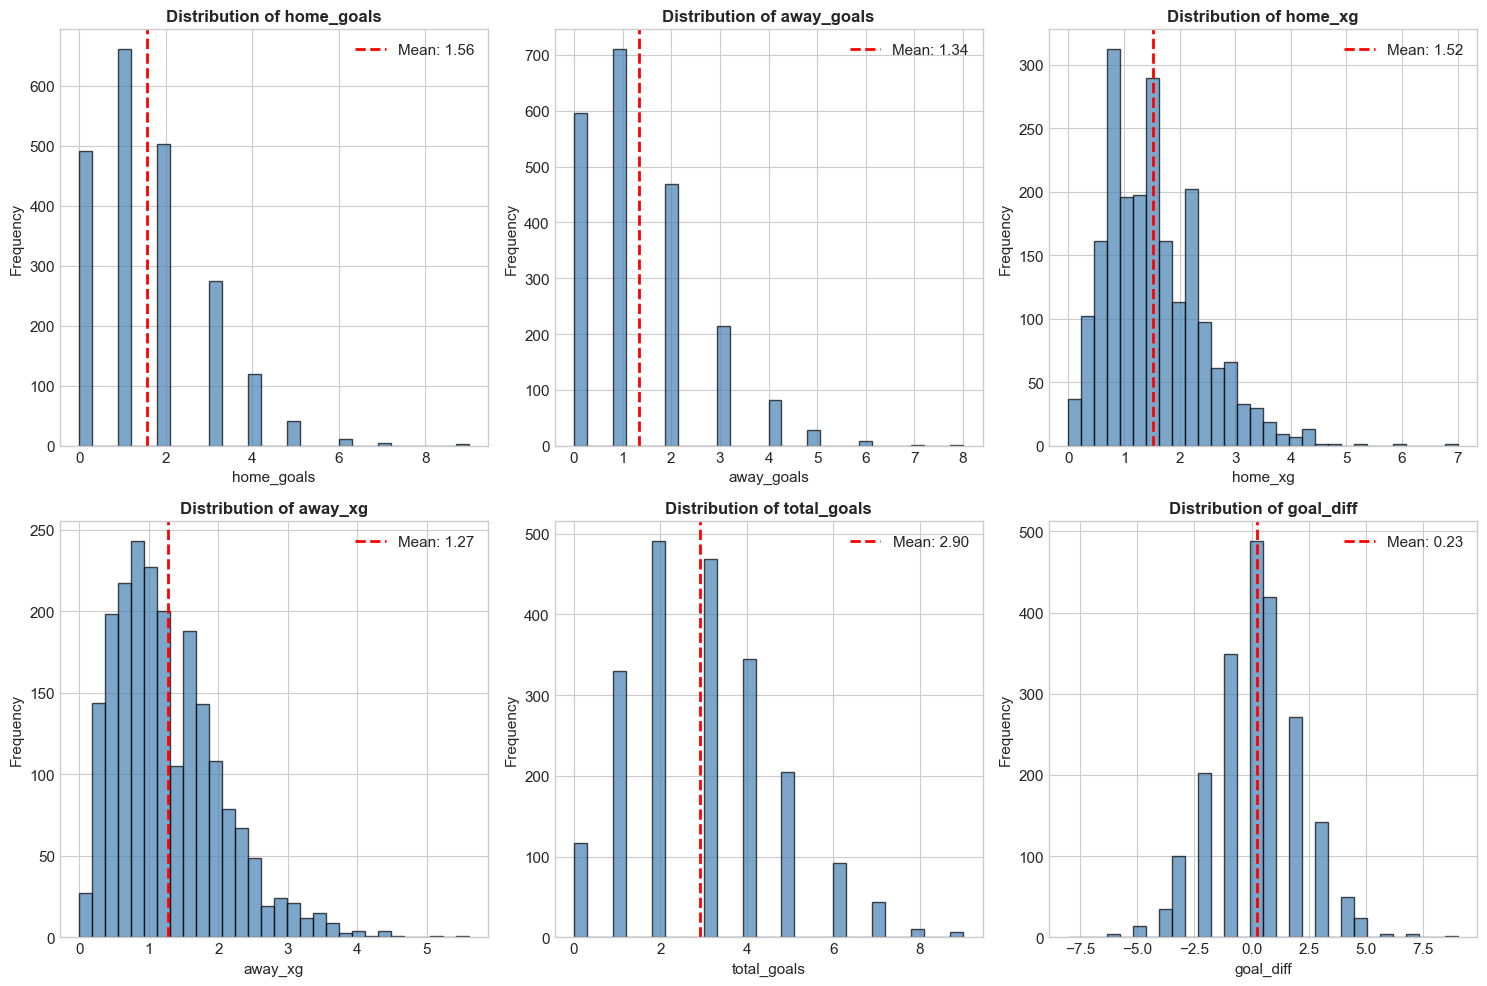

In [10]:
# Distribution of key metrics
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i, col in enumerate(available_cols):
    axes[i].hist(fixtures[col].dropna(), bins=30, color='steelblue', edgecolor='black', alpha=0.7)
    axes[i].set_title(f'Distribution of {col}', fontsize=12, fontweight='bold')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')
    axes[i].axvline(fixtures[col].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {fixtures[col].mean():.2f}')
    axes[i].legend()

plt.tight_layout()
plt.savefig('../notebooks/figures/metrics_distribution.png', dpi=150, bbox_inches='tight')
plt.show()

## 5. Match Results Distribution

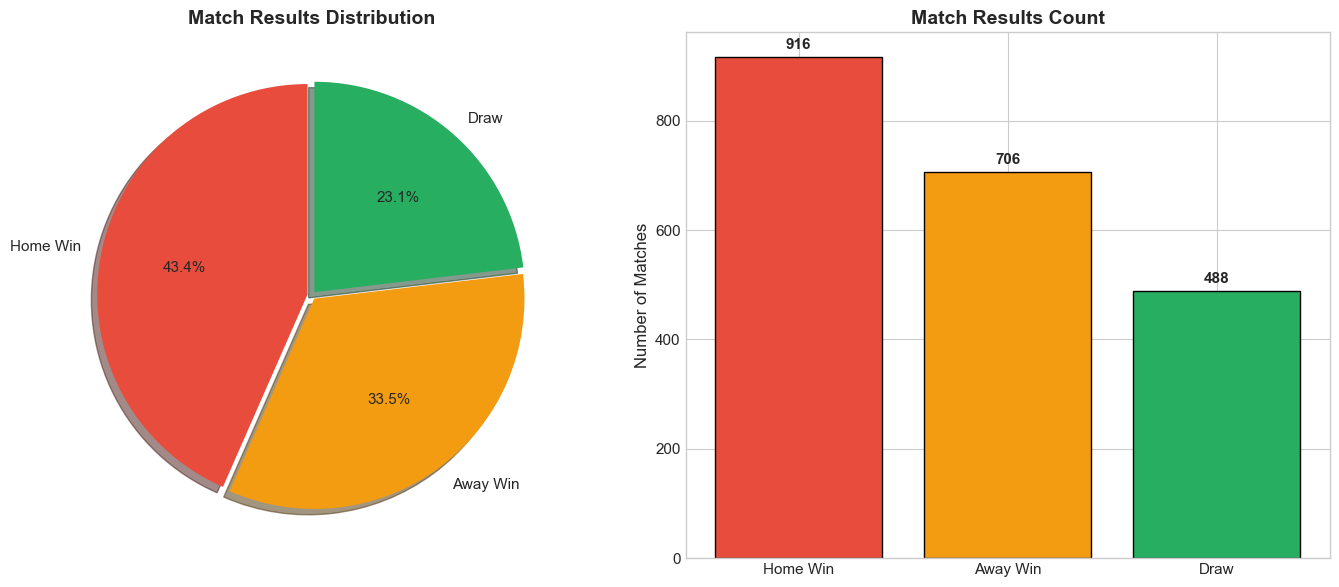


🏆 Home Win Advantage: 43.4%


In [11]:
# Match result distribution
if 'match_result' in fixtures.columns:
    result_map = {0: 'Away Win', 1: 'Draw', 2: 'Home Win'}
    fixtures['result_label'] = fixtures['match_result'].map(result_map)
    
    result_counts = fixtures['result_label'].value_counts()
    
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))
    
    # Pie chart
    colors_pie = ['#e74c3c', '#f39c12', '#27ae60']
    explode = (0.02, 0.02, 0.02)
    axes[0].pie(result_counts, labels=result_counts.index, autopct='%1.1f%%', 
                colors=colors_pie, explode=explode, shadow=True, startangle=90)
    axes[0].set_title('Match Results Distribution', fontsize=14, fontweight='bold')
    
    # Bar chart
    bars = axes[1].bar(result_counts.index, result_counts.values, color=colors_pie, edgecolor='black')
    axes[1].set_ylabel('Number of Matches', fontsize=12)
    axes[1].set_title('Match Results Count', fontsize=14, fontweight='bold')
    
    for bar, val in zip(bars, result_counts.values):
        axes[1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 10, 
                     str(val), ha='center', va='bottom', fontsize=11, fontweight='bold')
    
    plt.tight_layout()
    plt.savefig('../notebooks/figures/match_results.png', dpi=150, bbox_inches='tight')
    plt.show()
    
    print(f"\n🏆 Home Win Advantage: {(result_counts.get('Home Win', 0) / result_counts.sum() * 100):.1f}%")

## 6. Summary Statistics

In [12]:
# Summary box
display(Markdown(f"""
# 📊 DATA OVERVIEW SUMMARY

---

| Metric | Value |
|--------|-------|
| ✅ Total Matches Analyzed | **{len(fixtures):,}** |
| ✅ Seasons Covered | **{fixtures['season'].nunique()}** ({fixtures['season'].min()} → {fixtures['season'].max()}) |
| ✅ Unique Teams | **{len(all_teams)}** |

---

## ⚽ Goals Statistics

| Metric | Value |
|--------|-------|
| Total Goals | **{fixtures['total_goals'].sum():,.0f}** |
| Average Goals per Match | **{fixtures['total_goals'].mean():.2f}** |
| Max Goals in a Match | **{fixtures['total_goals'].max():.0f}** |

---

## 📈 xG Statistics

| Metric | Value |
|--------|-------|
| Average Home xG | **{fixtures['home_xg'].mean():.2f}** |
| Average Away xG | **{fixtures['away_xg'].mean():.2f}** |
| Home xG Advantage | **{((fixtures['home_xg'].mean() / fixtures['away_xg'].mean()) - 1) * 100:.1f}%** |
"""))


# 📊 DATA OVERVIEW SUMMARY

---

| Metric | Value |
|--------|-------|
| ✅ Total Matches Analyzed | **2,110** |
| ✅ Seasons Covered | **6** (2020-2021 → 2025-2026) |
| ✅ Unique Teams | **28** |

---

## ⚽ Goals Statistics

| Metric | Value |
|--------|-------|
| Total Goals | **6,127** |
| Average Goals per Match | **2.90** |
| Max Goals in a Match | **9** |

---

## 📈 xG Statistics

| Metric | Value |
|--------|-------|
| Average Home xG | **1.52** |
| Average Away xG | **1.27** |
| Home xG Advantage | **19.6%** |
